In [1]:
import pandas as pd
import numpy as np

In [2]:
data2 = pd.read_csv("Dataset_5971.csv")
data2

,LABEL,TEXT
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,Smishing,Please Stay At Home. To encourage the notion o...
...,...,...
5966,ham,:( but your not here....
5967,ham,Becoz its &lt;#&gt; jan whn al the post ofic...
5968,ham,Its a valentine game. . . send dis msg to all ...
5969,ham,We r outside already.


In [3]:
import pandas as pd

# Try reading the CSV file with different encodings and error handling
try:
    # Try UTF-8 encoding first
    df = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        # Try a different encoding such as 'latin1'
        df = pd.read_csv('spam.csv', encoding='latin1')
    except UnicodeDecodeError:
        # If none of the encodings work, you can try different error handling
        df = pd.read_csv('spam.csv', error_bad_lines=False)

# Display the DataFrame
print(df)


        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5085   ham                                       Huh y lei...        NaN   
5086  spam  REMINDER FROM O2: To get 2.50 pounds free call...        NaN   
5087  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5088   ham  The guy did some bitching but I acted like i'd...        NaN   
5089   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5085,ham,Huh y lei...,NaN,NaN,NaN
5086,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5087,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5088,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df = df.iloc[:,0:2]
df = df.rename(columns={'v1': 'LABEL', 'v2': 'TEXT'})
df

,LABEL,TEXT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5085,ham,Huh y lei...
5086,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5087,spam,This is the 2nd time we have tried 2 contact u...
5088,ham,The guy did some bitching but I acted like i'd...


In [6]:
data = pd.concat([data2, df])

data = data.reset_index(drop=True)
data

,LABEL,TEXT
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,Smishing,Please Stay At Home. To encourage the notion o...
...,...,...
11056,ham,Huh y lei...
11057,spam,REMINDER FROM O2: To get 2.50 pounds free call...
11058,spam,This is the 2nd time we have tried 2 contact u...
11059,ham,The guy did some bitching but I acted like i'd...


In [7]:
data['LABEL'] = data['LABEL'].apply(lambda x: x.lower())

In [8]:
data['LABEL'].unique()

array(['ham', 'smishing', 'spam'], dtype=object)

In [9]:
data = data.rename(columns={'LABEL': 'label', 'TEXT': 'text'})

In [10]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['label'] = en.fit_transform(data['label'])
data

,label,text
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,0,What's up? Do you want me to come online? If y...
2,0,So u workin overtime nigpun?
3,0,"Also sir, i sent you an email about how to log..."
4,1,Please Stay At Home. To encourage the notion o...
...,...,...
11056,0,Huh y lei...
11057,2,REMINDER FROM O2: To get 2.50 pounds free call...
11058,2,This is the 2nd time we have tried 2 contact u...
11059,0,The guy did some bitching but I acted like i'd...


In [11]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [12]:
data.duplicated().sum()

4196

In [13]:
data = data.drop_duplicates(keep='first')
data

,label,text
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,0,What's up? Do you want me to come online? If y...
2,0,So u workin overtime nigpun?
3,0,"Also sir, i sent you an email about how to log..."
4,1,Please Stay At Home. To encourage the notion o...
...,...,...
11007,0,Oh... Okie lor...We go on sat...
11018,2,PRIVATE! Your 2003 Account Statement for shows...
11029,2,Want explicit SEX in 30 secs? Ring 02073162414...
11032,2,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...


In [14]:
data = data.reset_index(drop=True)
data

,label,text
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,0,What's up? Do you want me to come online? If y...
2,0,So u workin overtime nigpun?
3,0,"Also sir, i sent you an email about how to log..."
4,1,Please Stay At Home. To encourage the notion o...
...,...,...
6860,0,Oh... Okie lor...We go on sat...
6861,2,PRIVATE! Your 2003 Account Statement for shows...
6862,2,Want explicit SEX in 30 secs? Ring 02073162414...
6863,2,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...


In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(6865, 2)

In [17]:
data['label'].value_counts()

0    5356
2     881
1     628
Name: label, dtype: int64

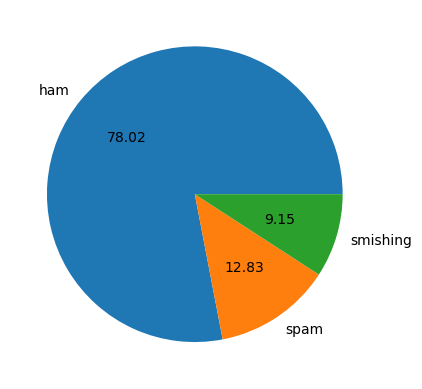

In [18]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(),labels = ['ham','spam','smishing'],autopct='%0.2f')
plt.show()

In [19]:
data['characters'] = data['text'].apply(len)
data

,label,text,characters
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136
1,0,What's up? Do you want me to come online? If y...,79
2,0,So u workin overtime nigpun?,28
3,0,"Also sir, i sent you an email about how to log...",173
4,1,Please Stay At Home. To encourage the notion o...,152
...,...,...,...
6860,0,Oh... Okie lor...We go on sat...,33
6861,2,PRIVATE! Your 2003 Account Statement for shows...,134
6862,2,Want explicit SEX in 30 secs? Ring 02073162414...,90
6863,2,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160


In [20]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
data['words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
data

,label,text,characters,words
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37
1,0,What's up? Do you want me to come online? If y...,79,20
2,0,So u workin overtime nigpun?,28,6
3,0,"Also sir, i sent you an email about how to log...",173,37
4,1,Please Stay At Home. To encourage the notion o...,152,27
...,...,...,...,...
6860,0,Oh... Okie lor...We go on sat...,33,10
6861,2,PRIVATE! Your 2003 Account Statement for shows...,134,22
6862,2,Want explicit SEX in 30 secs? Ring 02073162414...,90,18
6863,2,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38


In [23]:
data['sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
data

,label,text,characters,words,sentences
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11
1,0,What's up? Do you want me to come online? If y...,79,20,3
2,0,So u workin overtime nigpun?,28,6,1
3,0,"Also sir, i sent you an email about how to log...",173,37,3
4,1,Please Stay At Home. To encourage the notion o...,152,27,4
...,...,...,...,...,...
6860,0,Oh... Okie lor...We go on sat...,33,10,1
6861,2,PRIVATE! Your 2003 Account Statement for shows...,134,22,4
6862,2,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
6863,2,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6


In [25]:
data[['characters','words','sentences']].describe()

,characters,words,sentences
count,6865.000000,6865.000000,6865.000000
mean,86.467298,19.564749,2.049818
std,59.284714,13.146795,1.488542
min,2.000000,1.000000,1.000000
25%,39.000000,10.000000,1.000000
50%,71.000000,17.000000,2.000000
75%,134.000000,28.000000,3.000000
max,910.000000,220.000000,38.000000


In [26]:
# For ham
data[data['label'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,5356.000000,5356.000000,5356.000000
mean,71.865571,17.446042,1.834765
std,57.015193,13.684367,1.419799
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# For Spam
data[data['label'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,628.000000,628.000000,628.000000
mean,139.601911,26.482484,2.734076
std,32.565539,6.773719,1.510511
min,34.000000,7.000000,1.000000
25%,127.000000,23.000000,2.000000
50%,146.000000,27.000000,2.000000
75%,156.000000,30.000000,4.000000
max,383.000000,75.000000,9.000000


In [28]:
# For Smishing
data[data['label'] == 2][['characters','words','sentences']].describe()

,characters,words,sentences
count,881.000000,881.000000,881.000000
mean,137.362089,27.514188,2.869467
std,31.172458,7.153835,1.449917
min,13.000000,2.000000,1.000000
25%,126.000000,25.000000,2.000000
50%,147.000000,28.000000,3.000000
75%,157.000000,32.000000,4.000000
max,379.000000,75.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

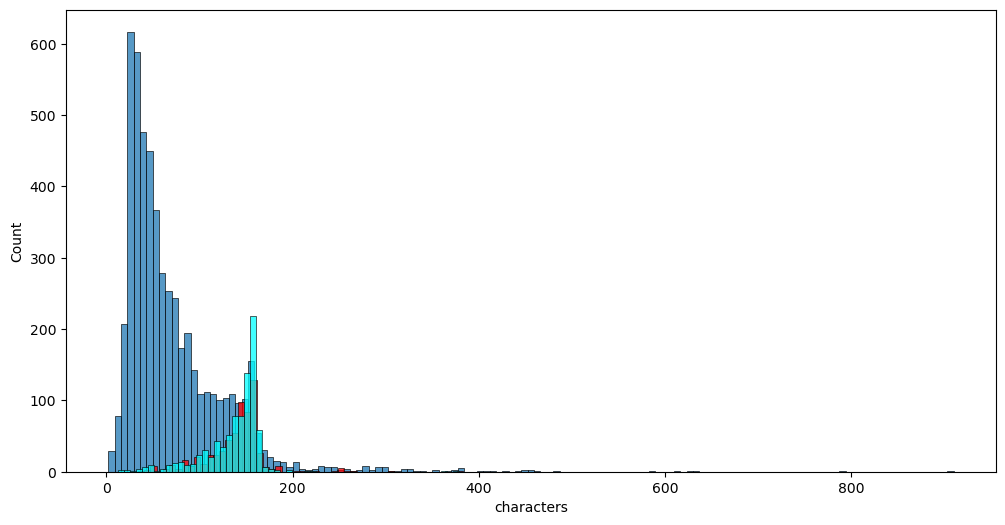

In [29]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data[data['label'] == 0]['characters'])
sns.histplot(data[data['label'] == 1]['characters'], color = 'red')
sns.histplot(data[data['label'] == 2]['characters'], color = 'cyan')

<Axes: xlabel='words', ylabel='Count'>

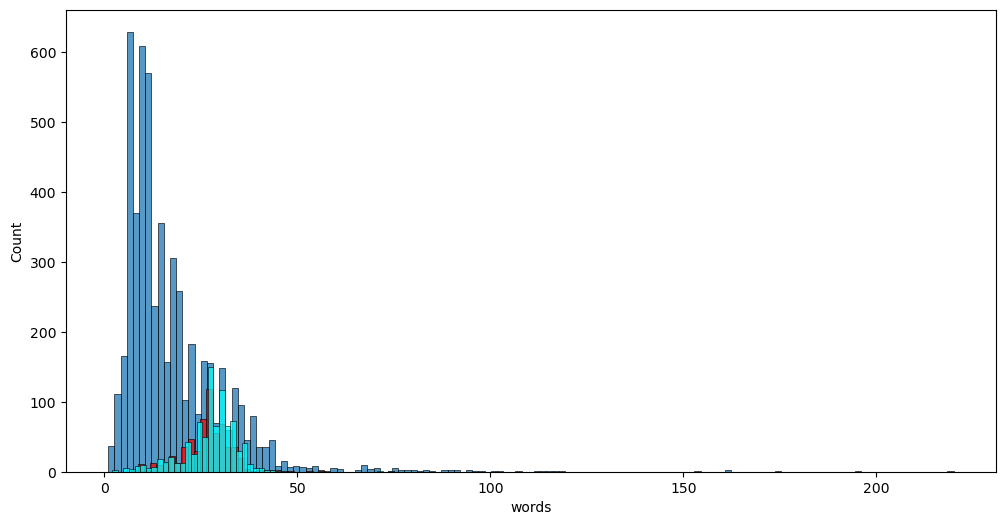

In [30]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['label'] == 0]['words'])
sns.histplot(data[data['label'] == 1]['words'], color = 'red')
sns.histplot(data[data['label'] == 2]['words'], color = 'cyan')

<Axes: xlabel='sentences', ylabel='Count'>

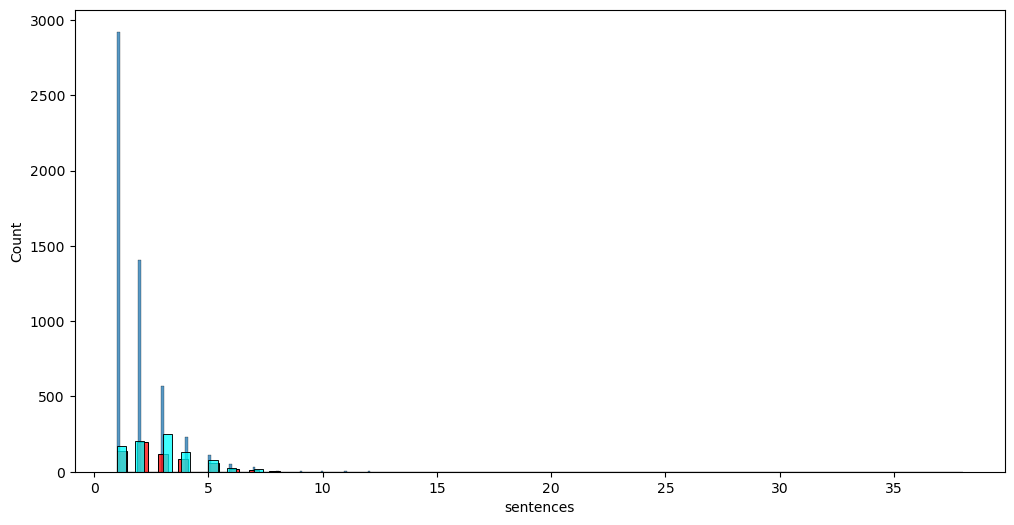

In [31]:
plt.figure(figsize=(12,6))

sns.histplot(data[data['label'] == 0]['sentences'])
sns.histplot(data[data['label'] == 1]['sentences'], color = 'red')
sns.histplot(data[data['label'] == 2]['sentences'], color = 'cyan')

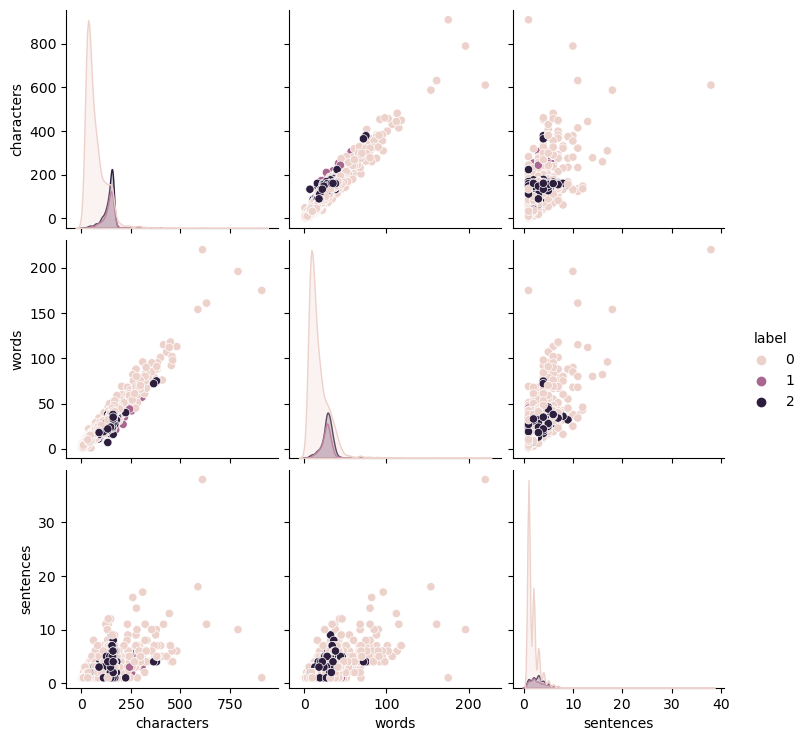

In [32]:
sns.pairplot(data, hue='label')

In [33]:
data.corr()

C:\Users\sunil\AppData\Local\Temp\ipykernel_5684\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,label,characters,words,sentences
label,1.000000,0.434779,0.292410,0.263718
characters,0.434779,1.000000,0.956865,0.602059
words,0.292410,0.956865,1.000000,0.663983
sentences,0.263718,0.602059,0.663983,1.000000


C:\Users\sunil\AppData\Local\Temp\ipykernel_5684\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

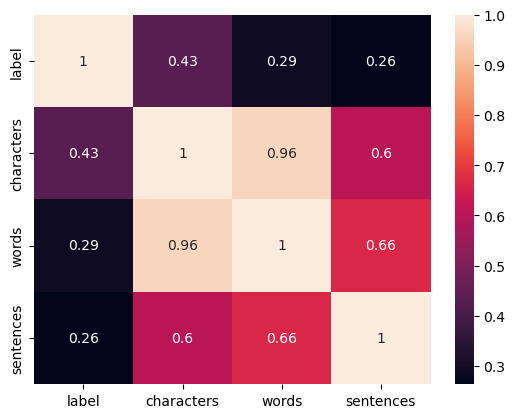

In [34]:
sns.heatmap(data.corr(), annot=True)

In [35]:
data

,label,text,characters,words,sentences
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11
1,0,What's up? Do you want me to come online? If y...,79,20,3
2,0,So u workin overtime nigpun?,28,6,1
3,0,"Also sir, i sent you an email about how to log...",173,37,3
4,1,Please Stay At Home. To encourage the notion o...,152,27,4
...,...,...,...,...,...
6860,0,Oh... Okie lor...We go on sat...,33,10,1
6861,2,PRIVATE! Your 2003 Account Statement for shows...,134,22,4
6862,2,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
6863,2,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6


In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform(text):
    text = text.lower()

    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]

    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]

    y = []
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    text = y[:]
    return " ".join(text)

In [38]:
data['text'][1010]

'URGENT! Your mobile was awarded a £1,500 Bonus Caller Prize on 27/6/03. Our final attempt 2 contact U! Call 08714714011'

In [39]:
transform("Who is the king &^ &* %$# of pirates in ONE Piece % ^& &%^$ * 123  54565 danced dance dancing killed kill")

'king pirat one piec 123 54565 danc danc danc kill kill'

In [40]:
data['n_text'] = data['text'].apply(lambda x: transform(x))

In [41]:
print(string.punctuation)
data

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,label,text,characters,words,sentences,n_text
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11,opinion jada kusruthi lovabl silent spl charac...
1,0,What's up? Do you want me to come online? If y...,79,20,3,want come onlin free talk
2,0,So u workin overtime nigpun?,28,6,1,u workin overtim nigpun
3,0,"Also sir, i sent you an email about how to log...",173,37,3,also sir sent email log usc payment portal sen...
4,1,Please Stay At Home. To encourage the notion o...,152,27,4,pleas stay home encourag notion stay home citi...
...,...,...,...,...,...,...
6860,0,Oh... Okie lor...We go on sat...,33,10,1,oh oki lor go sat
6861,2,PRIVATE! Your 2003 Account Statement for shows...,134,22,4,privat 2003 account statement show 800 point c...
6862,2,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
6863,2,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...


In [42]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(data[data['label'] == 2]['n_text'].str.cat(sep=' '))

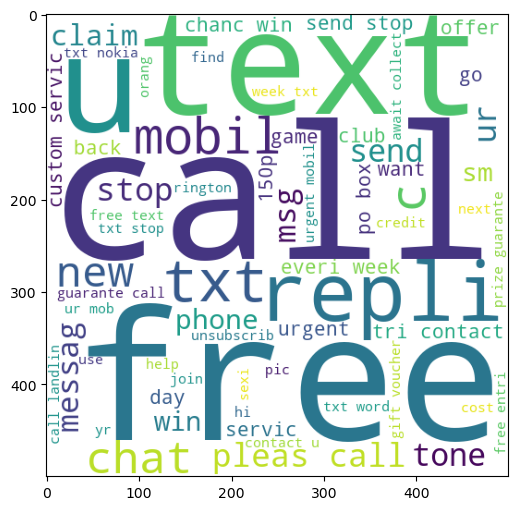

In [44]:
plt.figure(figsize=(6,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(data[data['label'] == 0]['n_text'].str.cat(sep = " "))

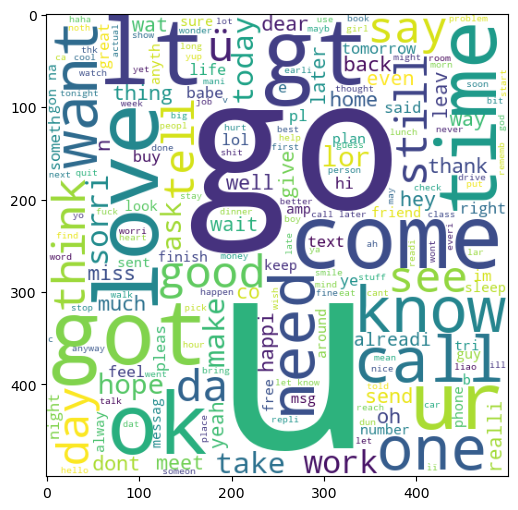

In [46]:
plt.figure(figsize=(6,6))
plt.imshow(ham_wc)

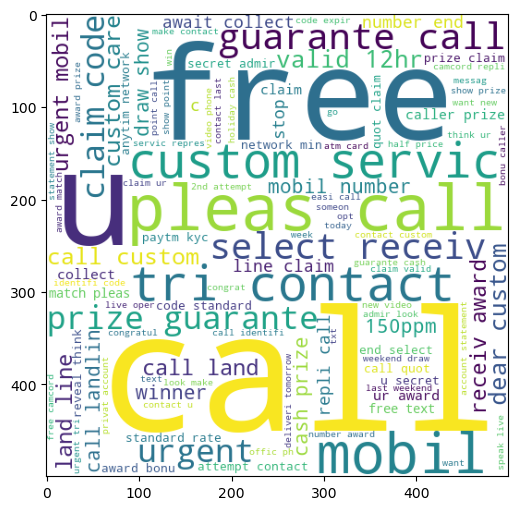

In [47]:
smishing_wc = wc.generate(data[data['label'] == 1]['n_text'].str.cat(sep = " "))
plt.figure(figsize=(6,6))
plt.imshow(smishing_wc)

In [48]:
spam_corpus = []
for i in data[data['label'] == 2]['n_text'].to_list():
    for j in i.split():
        spam_corpus.append(j)
len(spam_corpus)

13460

In [49]:
from collections import Counter
spam_most_common = pd.DataFrame(Counter(spam_corpus).most_common(50))
spam_most_common

,0,1
0,call,376
1,free,266
2,2,211
3,txt,211
4,ur,163
5,text,157
6,mobil,153
7,u,150
8,stop,143
9,4,136


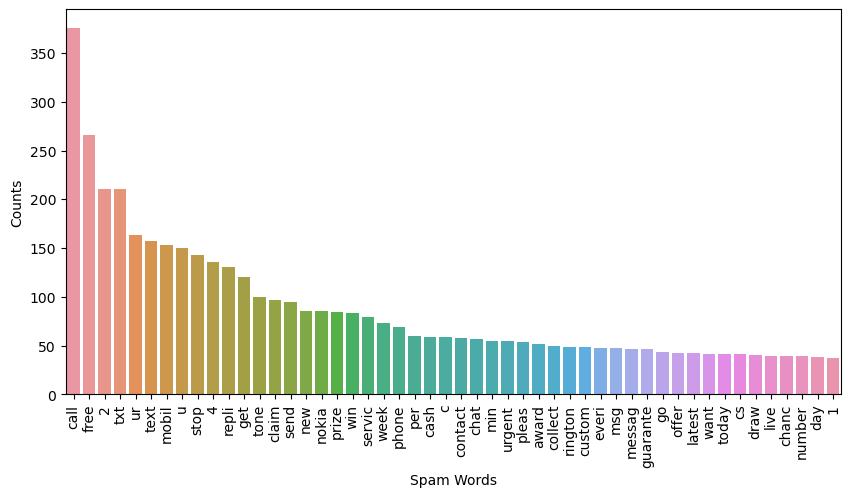

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x = spam_most_common[0],y = spam_most_common[1])
plt.xlabel("Spam Words")
plt.ylabel("Counts")
plt.xticks(rotation = 'vertical')
plt.show()

In [51]:
ham_corpus = []
for i in data[data['label']==0]['n_text'].to_list():
    for j in i.split(" "):
        ham_corpus.append(j)
print(len(ham_corpus))

43059


In [52]:
ham_most_common = pd.DataFrame(Counter(ham_corpus).most_common(50))
ham_most_common

,0,1
0,u,1122
1,go,493
2,get,386
3,2,356
4,come,328
5,gt,310
6,lt,308
7,call,302
8,ur,278
9,like,274


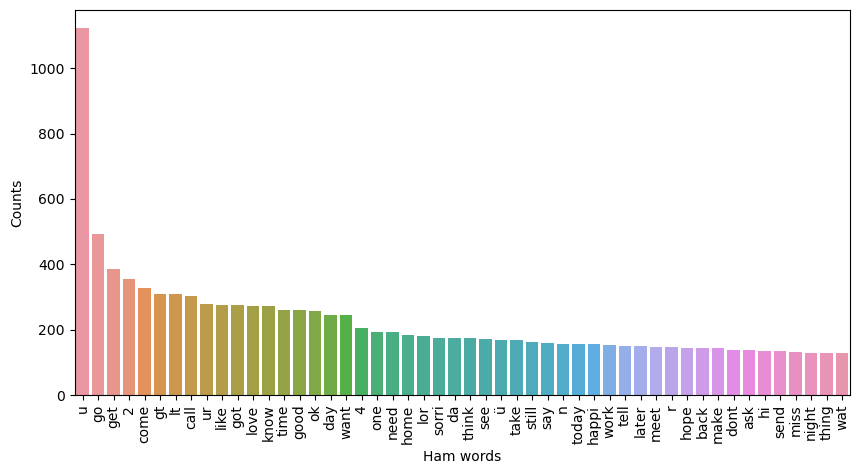

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x = ham_most_common[0], y = ham_most_common[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Ham words')
plt.ylabel('Counts')
plt.show()

In [54]:
smishing_corpus = []
for i in data[data['label']==1]['n_text'].to_list():
    for j in i.split(" "):
        smishing_corpus.append(j)
print(len(smishing_corpus))

8861


In [55]:
smi_most_common = pd.DataFrame(Counter(smishing_corpus).most_common(50))
smi_most_common

,0,1
0,call,401
1,claim,174
2,custom,157
3,prize,141
4,free,120
5,pleas,118
6,mobil,115
7,contact,105
8,2,102
9,award,100


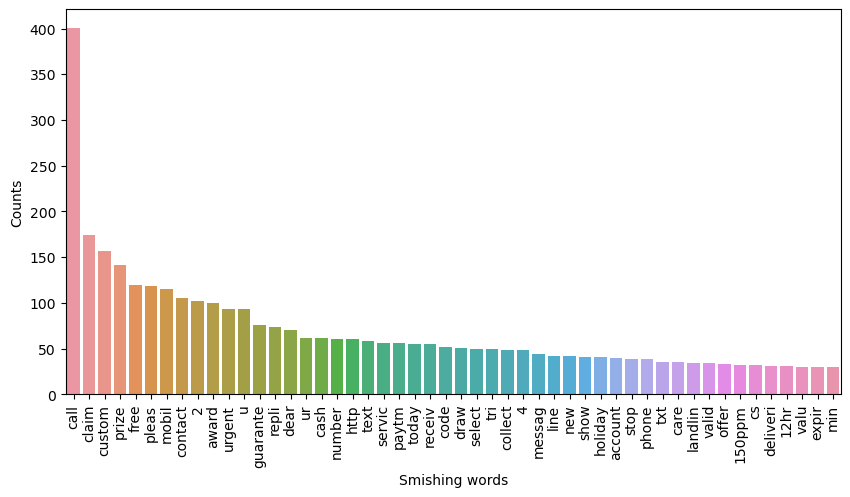

In [56]:
plt.figure(figsize = (10,5))
sns.barplot(x=smi_most_common[0],y=smi_most_common[1])
plt.xticks(rotation = 'vertical')
plt.xlabel('Smishing words')
plt.ylabel('Counts')
plt.show()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features = 5000)
tfidf = TfidfVectorizer(max_features = 5000)

In [58]:
x1 = cv.fit_transform(data['n_text']).toarray()
x2 = tfidf.fit_transform(data['n_text']).toarray()

In [59]:
print(x1.shape)
print(x2.shape)

(6865, 5000)
(6865, 5000)


In [60]:
y = data['label'].values

In [61]:
for i in range(len(y)):
    if y[i] == 2:
        y[i] = 1

In [62]:
from sklearn.model_selection import train_test_split

x1train, x1test, y1train, y1test = train_test_split(x1,y, test_size = 0.2, random_state = 2)
x2train, x2test, y2train, y2test = train_test_split(x2,y, test_size = 0.2, random_state = 2)

In [63]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [64]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [65]:
gnb1.fit(x1train,y1train)
y1pred = gnb1.predict(x1test)
print("Accuracy score= ", accuracy_score(y1pred, y1test))
print("Precision score= ", precision_score(y1pred, y1test))

Accuracy score=  0.8579752367079388
Precision score=  0.959731543624161


In [66]:
mnb1.fit(x1train,y1train)
y1pred = mnb1.predict(x1test)
print("Accuracy score= ", accuracy_score(y1pred, y1test))
print("Precision score= ", precision_score(y1pred, y1test))

Accuracy score=  0.9715950473415877
Precision score=  0.9295302013422819


In [67]:
bnb1.fit(x1train,y1train)
y1pred = bnb1.predict(x1test)
print("Accuracy score= ", accuracy_score(y1pred, y1test))
print("Precision score= ", precision_score(y1pred, y1test))

Accuracy score=  0.9774217042971595
Precision score=  0.912751677852349


In [68]:
gnb2 = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()

In [69]:
gnb2.fit(x2train,y2train)
y2pred = gnb2.predict(x2test)
print("Accuracy score= ", accuracy_score(y2pred, y2test))
print("Precision score= ", precision_score(y2pred, y2test))

Accuracy score=  0.8572469045884924
Precision score=  0.9463087248322147


In [70]:
mnb2.fit(x2train,y2train)
y2pred = mnb2.predict(x2test)
print("Accuracy score= ", accuracy_score(y2pred, y2test))
print("Precision score= ", precision_score(y2pred, y2test))

Accuracy score=  0.9737800436999272
Precision score=  0.8825503355704698


In [71]:
bnb2.fit(x2train,y2train)
y2pred = bnb2.predict(x2test)
print("Accuracy score= ", accuracy_score(y2pred, y2test))
print("Precision score= ", precision_score(y2pred, y2test))

Accuracy score=  0.9774217042971595
Precision score=  0.912751677852349


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [74]:
svc.fit(x1train,y1train)
y1pred = svc.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.8885651857246905
0.7474402730375427


In [75]:
knc.fit(x1train,y1train)
y1pred = knc.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9133284777858703
0.994475138121547


In [76]:
mnb.fit(x1train,y1train)
y1pred = mnb.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9715950473415877
0.9389830508474576


In [77]:
dtc.fit(x1train,y1train)
y1pred = dtc.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9075018208302986
0.8154981549815498


In [78]:
lrc.fit(x1train,y1train)
y1pred = lrc.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9759650400582666
0.974910394265233


In [79]:
rfc.fit(x1train,y1train)
y1pred = rfc.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9817916970138383
1.0


In [80]:
abc.fit(x1train,y1train)
y1pred = abc.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9628550619082301
0.942652329749104


In [81]:
xgb.fit(x1train,y1train)
y1pred = xgb.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9701383831026948
0.9776951672862454


In [82]:
bc.fit(x1train,y1train)
y1pred = bc.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9730517115804806
0.9578947368421052


In [83]:
etc.fit(x1train,y1train)
y1pred = etc.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9810633648943918
0.9892086330935251


In [84]:
gbdt.fit(x1train,y1train)
y1pred = gbdt.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9482884195193008
0.970954356846473


In [85]:
xgb.fit(x1train,y1train)
y1pred = xgb.predict(x1test)
print(accuracy_score(y1test,y1pred))
print(precision_score(y1test,y1pred))

0.9701383831026948
0.9776951672862454


In [86]:
svc.fit(x2train,y2train)
y2pred = svc.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9737800436999272
0.9816176470588235


In [87]:
knc.fit(x2train,y2train)
y2pred = knc.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9104151493080845
1.0


In [88]:
mnb.fit(x2train,y2train)
y2pred = mnb.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9737800436999272
0.9962121212121212


In [89]:
dtc.fit(x2train,y2train)
y2pred = dtc.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9147851420247632
0.8693877551020408


In [90]:
lrc.fit(x2train,y2train)
y2pred = lrc.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.954843408594319
0.9682539682539683


In [91]:
rfc.fit(x2train,y2train)
y2pred = rfc.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9832483612527313
1.0


In [92]:
abc.fit(x2train,y2train)
y2pred = abc.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.965768390386016
0.9530685920577617


In [93]:
xgb.fit(x2train,y2train)
y2pred = xgb.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9664967225054625
0.9598540145985401


In [94]:
bc.fit(x2train,y2train)
y2pred = bc.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9694100509832484
0.9324324324324325


In [95]:
etc.fit(x2train,y2train)
y2pred = etc.predict(x2test)
print(accuracy_score(y2test,y2pred))

0.9803350327749454


In [96]:
gbdt.fit(x2train,y2train)
y2pred = gbdt.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9504734158776402
0.96


In [97]:
xgb.fit(x2train,y2train)
y2pred = xgb.predict(x2test)
print(accuracy_score(y2test,y2pred))
print(precision_score(y2test,y2pred))

0.9664967225054625
0.9598540145985401


In [98]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc, open('model.pkl','wb'))

In [129]:
data[data['label'] == 0]['text'][15]

"I'm e person who's doing e sms survey..."

In [128]:
data[data['label'] == 1]['text'][26]

'UR awarded a City Break and could WIN a £200 Summer Shopping spree every WK. Txt STORE to 88039 . SkilGme. TsCs087147403233'

In [127]:
pickle.dump(stopwords.words('english'), open('stopwords.pkl','wb'))